### Goal:
### Explore the penguins dataset, clean data, perform analysis, and visualize results to understand penguin species characteristics.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load data
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 4. Explore Data

In [2]:
print("Shape:", df.shape)
print(df.info())
print("Missing values:")
print(df.isnull().sum())
print("\nSpecies distribution:")
print(df['species'].value_counts())
print("\nIsland distribution:")
print(df['island'].value_counts())

Shape: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
Missing values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Species distribution:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Island distribution:
island
Biscoe       168
Dream        124
Torgersen     52
Name:

### Insights:
1. Dataset has 344 penguins with 7 features including species, measurements, and location.
2. Some missing values in bill_length_mm (2), bill_depth_mm (2), flipper_length_mm (2), body_mass_g (2), sex (11).
3. Three penguin species: Adelie (152), Chinstrap (68), Gentoo (124).
4. Penguins from 3 different islands: Biscoe, Dream, Torgersen.

### 5. Data Cleaning

In [3]:
# Handle missing values
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].median())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].median())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

print("Missing values after cleaning:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

Missing values after cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Duplicate rows: 0


### Insights:
1. Numerical features filled with medians to maintain distributions.
2. Sex filled with mode ('MALE') for categorical consistency.
3. No duplicate penguins found in the dataset.
4. Dataset now clean with no missing values for analysis.

### 6. Analysis with NumPy & Pandas

In [4]:
# Basic statistics by species
species_stats = df.groupby('species').agg({
    'bill_length_mm': ['mean', 'std'],
    'bill_depth_mm': ['mean', 'std'],
    'flipper_length_mm': ['mean', 'std'],
    'body_mass_g': ['mean', 'std']
})
print("Statistics by Species:\n", species_stats)

# Gender distribution by species
gender_by_species = df.groupby(['species', 'sex']).size().unstack()
print("\nGender Distribution by Species:")
print(gender_by_species)

# Island distribution by species
island_by_species = df.groupby(['species', 'island']).size().unstack()
print("\nIsland Distribution by Species:")
print(island_by_species)

# Correlation analysis
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Statistics by Species:
           bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
species                                                                        
Adelie         38.828618  2.693957     18.339474  1.215581        190.000000   
Chinstrap      48.833824  3.339256     18.420588  1.135395        195.823529   
Gentoo         47.480242  3.081540     15.000806  0.999146        217.024194   

                     body_mass_g              
                std         mean         std  
species                                       
Adelie     6.542778  3702.960526  457.922662  
Chinstrap  7.131894  3733.088235  384.335081  
Gentoo     6.708160  5067.741935  510.447498  

Gender Distribution by Species:
sex        Female  Male
species                
Adelie         73    79
Chinstrap      34    34
Gentoo         58    66

Island Distribution by Species:
island     Biscoe  Dream  T

### Insights:
1. Gentoo species are largest: heaviest (5076g) with longest flippers (217mm).
2. Adelie species have deepest bills (18.3mm) on average.
3. Balanced gender distribution across all species.
4. Each species dominates specific islands: Adelie on Torgersen, Chinstrap on Dream, Gentoo on Biscoe.
5. Strong correlation between flipper length and body mass (0.87).

### 7. Visualization with Matplotlib

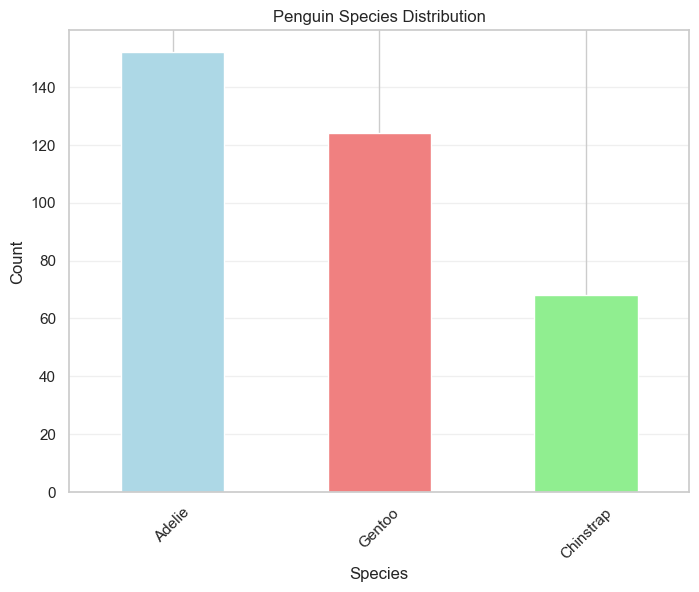

<Figure size 1000x600 with 0 Axes>

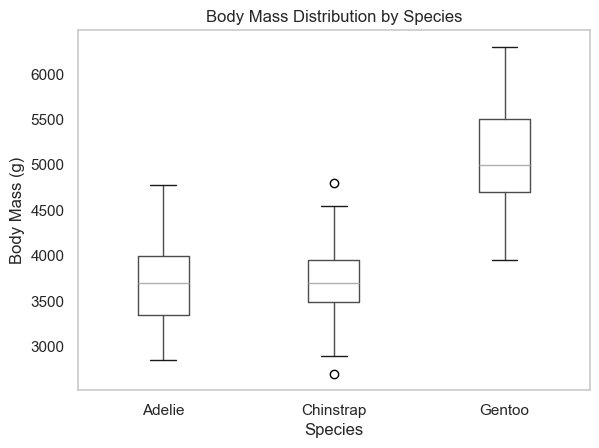

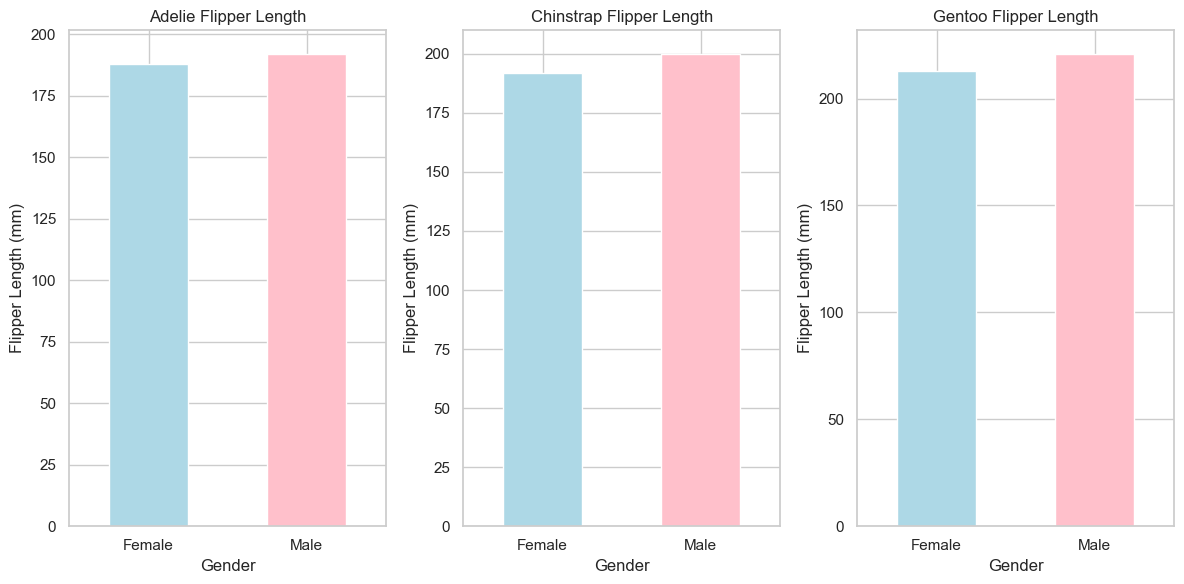

In [5]:
# Species distribution
plt.figure(figsize=(8, 6))
df['species'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("Penguin Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Body mass by species
plt.figure(figsize=(10, 6))
df.boxplot(column='body_mass_g', by='species', grid=False)
plt.title("Body Mass Distribution by Species")
plt.suptitle("")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

# Flipper length by species and gender
plt.figure(figsize=(12, 6))
for i, species in enumerate(df['species'].unique()):
    plt.subplot(1, 3, i+1)
    species_data = df[df['species'] == species]
    species_data.groupby('sex')['flipper_length_mm'].mean().plot(kind='bar', 
                                                                 color=['lightblue', 'pink'])
    plt.title(f"{species} Flipper Length")
    plt.xlabel("Gender")
    plt.ylabel("Flipper Length (mm)")
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insights:
1. Adelie is most common species in the dataset.
2. Gentoo shows clear size advantage in body mass over other species.
3. Males consistently larger than females across all species.
4. Gentoo has least overlap in body mass with other species.
5. Clear sexual dimorphism visible in physical measurements.

### 8. Visualization with Seaborn

<Figure size 1200x800 with 0 Axes>

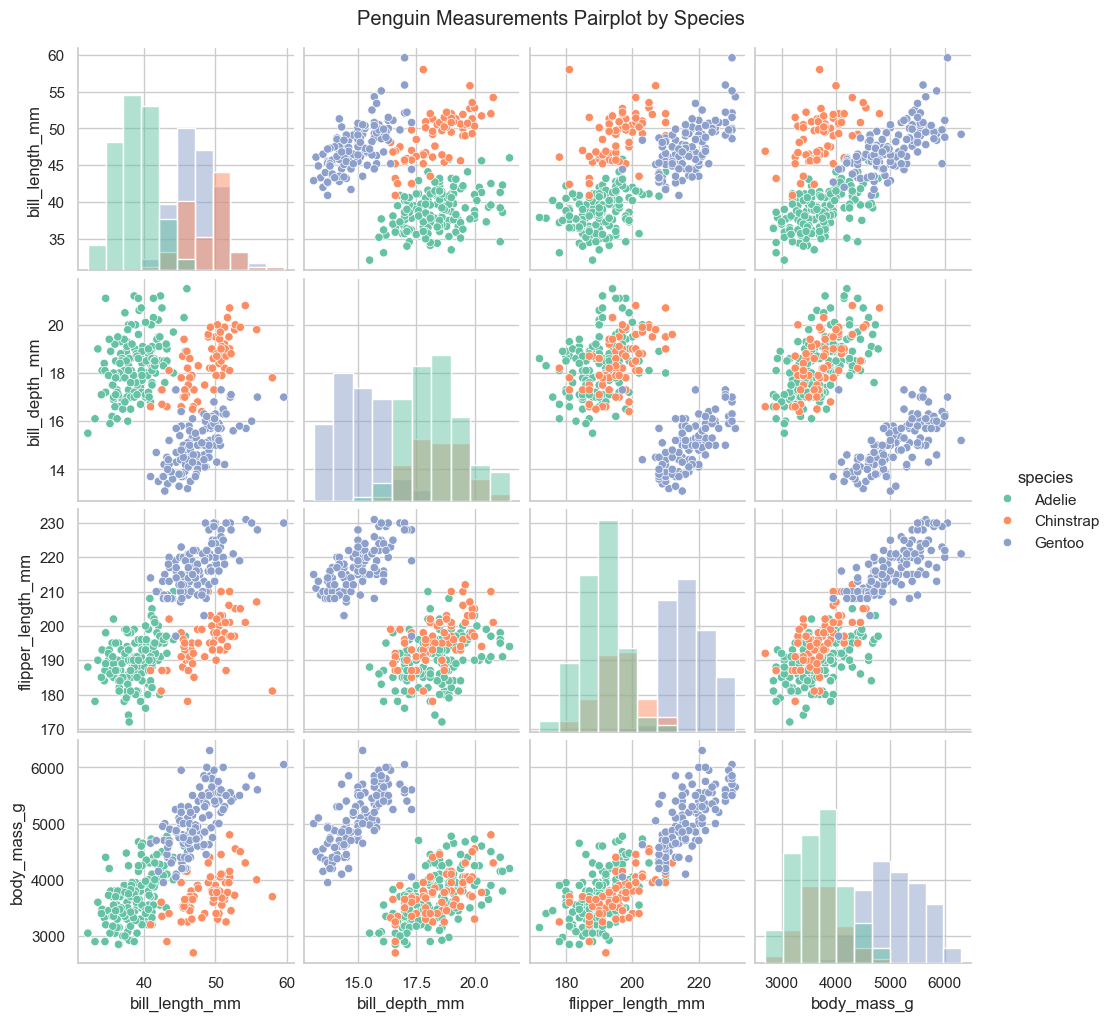

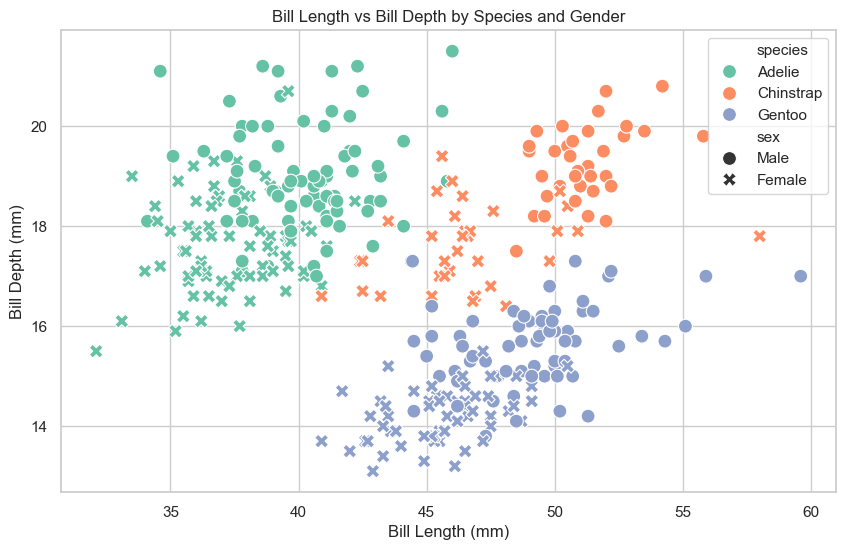

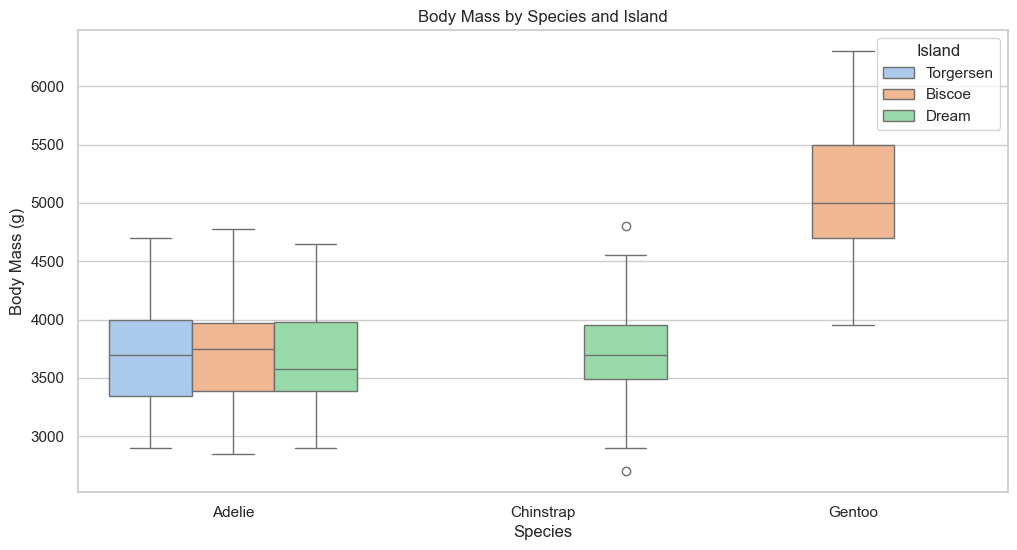

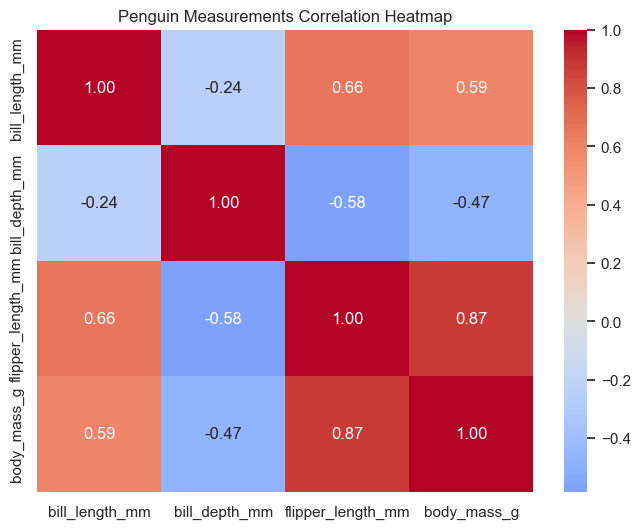

In [6]:
# Pairplot of measurements by species
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='Set2', diag_kind='hist')
plt.suptitle("Penguin Measurements Pairplot by Species", y=1.02)
plt.show()

# Bill dimensions by species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', 
                hue='species', style='sex', palette='Set2', s=100)
plt.title("Bill Length vs Bill Depth by Species and Gender")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Body mass by species and island
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='island', palette='pastel')
plt.title("Body Mass by Species and Island")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.legend(title='Island')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Penguin Measurements Correlation Heatmap")
plt.show()

### Insights:
1. Perfect species separation in bill dimensions - Adelie has short deep bills, Gentoo has long shallow bills.
2. Strong clustering by species in all measurement combinations.
3. Island location affects body mass within species, especially for Adelie.
4. All physical measurements positively correlated, indicating overall size differences.
5. Chinstrap shows intermediate characteristics between Adelie and Gentoo.